In [ ]:
import tensorflow.keras as tf
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.datasets.mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain[30]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
ytrain[30]

3

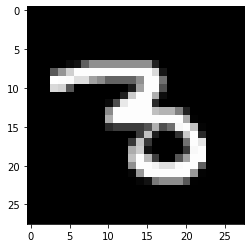

In [ ]:
plt.imshow(xtrain[30],cmap="gray")
plt.show()

In [ ]:
### Model
model = tf.models.Sequential()   ##blank model
model.add(tf.layers.Flatten())   ##input layer
model.add(tf.layers.Dense(784,activation="relu"))  ## hidden (28x28)
model.add(tf.layers.Dense(10,activation="softmax"))  ## output layer
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
## Scale the data
xtrain = xtrain/255
xtest = xtest/255

In [ ]:
xtrain[30]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
### Train the model
model.fit(xtrain,ytrain,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3193 - accuracy: 0.9055
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0784 - accuracy: 0.9753
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0448 - accuracy: 0.9858
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0330 - accuracy: 0.9897
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0246 - accuracy: 0.9925
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0176 - accuracy: 0.9948
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0136 - accuracy: 0.9958
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0115 - accuracy: 0.9958
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0121 - accuracy: 0.9963
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.009

In [ ]:
ypred = model.predict(xtest)

In [ ]:
ytest[102]

5

In [ ]:
ypred[102]

array([0.0000000e+00, 8.2715813e-33, 1.9632024e-35, 5.3514664e-14,
       0.0000000e+00, 1.0000000e+00, 8.7904972e-31, 5.9349835e-31,
       7.7421264e-23, 2.6734164e-21], dtype=float32)

In [ ]:
ypred[102].argmax()

5

In [ ]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.1156 - accuracy: 0.9826


[0.11558675765991211, 0.9825999736785889]

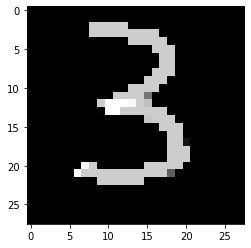

3

In [ ]:
### Preprocessing on Image and Checking
import cv2
import numpy as np
img = cv2.imread("3.png",0)
img = cv2.resize(img,(28,28))
img = cv2.bitwise_not(img)
img = img/255
plt.imshow(img,cmap='gray')
plt.show()
model.predict(np.array([[img]])).argmax()